In [88]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [89]:
import pandas as pd

df = pd.read_csv(r"C:\Users\tarus\deep_learning_codebasics\datasets\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
747/4825
# only 15% are spam, 85% are ham

0.15481865284974095

<h3>Handling imbalance in the dataset</h3>

In [7]:
# downsampling majority class
df_spam = df[df.Category == 'spam']
df_ham = df[df.Category == 'ham']

In [8]:
df_spam.shape

(747, 2)

In [9]:
df_ham.shape

(4825, 2)

In [10]:
df_ham_downsampled = df_ham.sample(len(df_spam))

In [11]:
df_balanced  = pd.concat([df_spam,df_ham_downsampled])
df_balanced

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
3438,ham,Then what about further plan?
4215,ham,Ard 530 like dat lor. We juz meet in mrt stati...
1865,ham,You call him now ok i said call him
3357,ham,Ok not a problem will get them a taxi. C ing ...


In [12]:
df_balanced.Category.value_counts()

Category
spam    747
ham     747
Name: count, dtype: int64

In [13]:
df_balanced['spam'] = df_balanced.Category.apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(10)

,Category,Message,spam
4059,ham,Hi di is yijue we're meeting at 7 pm at esapla...,0
2250,spam,"Thanks for your ringtone order, ref number R83...",1
2839,ham,Were trying to find a Chinese food place aroun...,0
2180,ham,And popping &lt;#&gt; ibuprofens was no help.,0
2991,ham,"Love isn't a decision, it's a feeling. If we c...",0
3298,spam,Todays Voda numbers ending 5226 are selected t...,1
3278,ham,Its a great day. Do have yourself a beautiful ...,0
910,spam,"January Male Sale! Hot Gay chat now cheaper, c...",1
420,spam,Send a logo 2 ur lover - 2 names joined by a h...,1
2042,ham,Ü dun wan to watch infernal affair?,0


In [14]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(df_balanced['Message'],df_balanced["spam"],stratify=df_balanced["spam"])
# stratify ensures that the ratio of different classes is the same in both the train and test sets

In [15]:
Xtrain.head()

1200    NEFT Transaction with reference number  &lt;#&...
1699    Free msg. Sorry, a service you ordered from 81...
1407    URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...
2035                Is avatar supposed to have subtoitles
5343    No go. No openings for that room 'til after th...
Name: Message, dtype: object

In [16]:
bert_preprocess = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")
bert_encoder = hub.KerasLayer( "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-l-12-h-768-a-12/4")

In [17]:
def get_sentence_embedding(msg):
    msg_preprocessed = bert_preprocess(msg)
    msg_encoded = bert_encoder(msg_preprocessed)
    return msg_encoded['pooled_output']

In [18]:
df_balanced.reset_index(inplace=True,drop=True)

In [19]:
df_balanced

,Category,Message,spam
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,spam,FreeMsg Hey there darling it's been 3 week's n...,1
2,spam,WINNER!! As a valued network customer you have...,1
3,spam,Had your mobile 11 months or more? U R entitle...,1
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
1489,ham,Then what about further plan?,0
1490,ham,Ard 530 like dat lor. We juz meet in mrt stati...,0
1491,ham,You call him now ok i said call him,0
1492,ham,Ok not a problem will get them a taxi. C ing ...,0


In [20]:
get_sentence_embedding([
    'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
    'I HAVE A DATE ON SUNDAY WITH WILL!!',
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.69305134, -0.3824184 , -0.9529148 , ..., -0.9012531 ,
        -0.6416806 ,  0.8353089 ],
       [-0.84763855, -0.3521588 , -0.18708089, ..., -0.10324933,
        -0.64631504,  0.9303065 ]], dtype=float32)>

In [21]:
e = get_sentence_embedding([
    'banana',
    'grapes',
    'mango',
    'jeff bezoz',
    'elon musk',
    'bill gates',
])

In [22]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.76071954, -0.14222385,  0.49599463, ...,  0.4215405 ,
        -0.53218514,  0.80314916],
       [-0.86038685, -0.21262017,  0.49019018, ...,  0.39687657,
        -0.6052787 ,  0.8448607 ],
       [-0.71292734, -0.15472871,  0.3831082 , ...,  0.35231316,
        -0.51005566,  0.7348722 ],
       [-0.8505135 , -0.44005907, -0.67127657, ..., -0.09757873,
        -0.5980778 ,  0.80840516],
       [-0.7502036 , -0.268037  , -0.267203  , ...,  0.02813728,
        -0.5936459 ,  0.7974844 ],
       [-0.78568745, -0.2996764 ,  0.41004923, ...,  0.5222164 ,
        -0.49591416,  0.81539726]], dtype=float32)>

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]],[e[3]])

array([[0.821667]], dtype=float32)

In [24]:
from tensorflow import keras
from keras.layers import Dense,Dropout,Input
from keras.models import Model
# BERT Layers
text_input = Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# neural network layers
dropout = Dropout(0.1,name="dropout")(outputs["pooled_output"])
l = Dense(1,activation='sigmoid',name="output")(dropout)

# construct final model
model = Model(inputs=[text_input], outputs=[l])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [26]:
METRICS = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall")
]

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)

In [27]:
model.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
35/35 [==============================] - 16s 287ms/step - loss: 0.6249 - accuracy: 0.6866 - precision: 0.6850 - recall: 0.6911
Epoch 2/10
35/35 [==============================] - 10s 287ms/step - loss: 0.4973 - accuracy: 0.8188 - precision: 0.8031 - recall: 0.8446
Epoch 3/10
35/35 [==============================] - 10s 288ms/step - loss: 0.4354 - accuracy: 0.8598 - precision: 0.8480 - recall: 0.8768
Epoch 4/10
35/35 [==============================] - 10s 288ms/step - loss: 0.3938 - accuracy: 0.8687 - precision: 0.8482 - recall: 0.8982
Epoch 5/10
35/35 [==============================] - 10s 288ms/step - loss: 0.3643 - accuracy: 0.8750 - precision: 0.8608 - recall: 0.8946
Epoch 6/10
35/35 [==============================] - 10s 288ms/step - loss: 0.3409 - accuracy: 0.8839 - precision: 0.8772 - recall: 0.8929
Epoch 7/10
35/35 [==============================] - 10s 288ms/step - loss: 0.3244 - accuracy: 0.8938 - precision: 0.8782 - recall: 0.9143
Epoch 8/10
35/35 [================

In [28]:
model.evaluate(Xtest,ytest)

12/12 [==============================] - 4s 279ms/step - loss: 0.2793 - accuracy: 0.9144 - precision: 0.8974 - recall: 0.9358


[0.2793436646461487,
 0.9144384860992432,
 0.8974359035491943,
 0.9358288645744324]

In [29]:
y_pred = model.predict(Xtest)
y_pred = y_pred.flatten()
y_pred[:5]

12/12 [==============================] - 4s 284ms/step


array([0.00841398, 0.97876257, 0.08160741, 0.6524616 , 0.29576352],
      dtype=float32)

In [30]:
import numpy as np
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(ytest,y_pred)
cm

array([[167,  20],
       [ 12, 175]], dtype=int64)

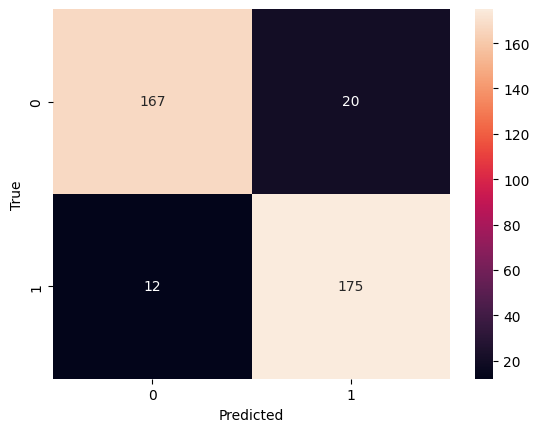

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [33]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       187
           1       0.90      0.94      0.92       187

    accuracy                           0.91       374
   macro avg       0.92      0.91      0.91       374
weighted avg       0.92      0.91      0.91       374



In [34]:
reviews = [
    "Ok lar... Joking wif u oni...",
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
    "Nah I don't think he goes to usf, he lives around here though",
    "Even my brother is not like to speak with me. They treat me like aids patent.",
    "WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.",
]

In [35]:
np.where(model.predict(reviews) >= 0.5, "spam", "ham")

1/1 [==============================] - 1s 570ms/step


array([['ham'],
       ['spam'],
       ['ham'],
       ['ham'],
       ['spam']], dtype='<U4')

In [92]:
model.save("saved_models/1/")

In [93]:
model.save("saved_models/2/")

In [94]:
model.save("saved_models/3/")

# Excercise

In [40]:
!pip install tf-models-official==2.13.* --ignore-installed

  Using cached tf_models_official-2.13.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached Cython-3.0.11-cp39-cp39-win_amd64.whl.metadata (3.2 kB)
  Using cached pillow-11.0.0-cp39-cp39-win_amd64.whl.metadata (9.3 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached google_api_python_client-2.153.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached psutil-6.1.0-cp37-abi3-win_amd64.whl.metadata (23 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 byte

ERROR: Cannot install tf-models-official==2.13.0, tf-models-official==2.13.1 and tf-models-official==2.13.2 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [41]:
import os
import shutil
from official.nlp import optimization # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [43]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.', cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir,'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir,'unsup')
shutil.rmtree(remove_dir)

84125825/84125825 [==============================] - 997s 12us/step


In [44]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [46]:
for text_batch,label_batch in train_ds.take(1):
    for i in range(3):
        print(f'Review: {text_batch.numpy()[i]}')
        label = label_batch.numpy()[i]
        print(f'Label: {label} ({class_names[label]})')

Review: b"Having seen most of Ringo Lam's films, I can say that this is his best film to date, and the most unusual. It's a ancient china period piece cranked full of kick-ass martial arts, where the location of an underground lair full of traps and dungeons plays as big a part as any of the characters. The action is fantastic, the story is tense and entertaining, and the set design is truely memorable. Sadly, Burning Paradise has not been made available on DVD and vhs is next-to-impossible to get your mitts on, even if you near the second biggest china-town in North America (like I do). If you can find it, don't pass it up."
Label: 1 (pos)
Review: b'Caution: May contain spoilers...<br /><br />I\'ve seen this movie 3 times & I\'ve liked it every time. Upon seeing it again, I\'m always reminded of how good it is. An HBO TV movie- very well done like most of their movies are- this would\'ve gotten Oscars for it\'s performances had it been released for general distribution instead of made

In [58]:
text_test = ['this is such an amazing movie']
text_preprocessed = bert_preprocess(text_test)

print(f'keys: {list(text_preprocessed.keys())}')
print(f'shape: {text_preprocessed["input_word_ids"].shape}')
print(f'word ids: {text_preprocessed["input_mask"][0,:12]}')
print(f'type ids: {text_preprocessed["input_type_ids"][0,:12]}')

keys: ['input_type_ids', 'input_word_ids', 'input_mask']
shape: (1, 128)
word ids: [1 1 1 1 1 1 1 1 0 0 0 0]
type ids: [0 0 0 0 0 0 0 0 0 0 0 0]


In [61]:
bert_results = bert_encoder(text_preprocessed)

print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.9286335  -0.32976747 -0.0793565   0.7145449   0.22622086 -0.08927708
  0.88103133  0.18877019 -0.3079576  -0.9999714  -0.0916824   0.7194092 ]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.11820809  0.24006274  0.15921974 ... -0.2628064   0.3607638
   0.10044013]
 [-0.58563966 -0.293924    0.15574059 ... -0.85786265  1.1583002
   0.2034985 ]
 [ 0.06012984 -0.18490446  0.49307474 ... -0.38698533  0.65782523
   0.48583493]
 ...
 [ 0.00751741 -0.29683784  0.29249924 ...  0.1414627   0.3469087
  -0.34770647]
 [-0.03399901 -0.32592037  0.3535368  ...  0.20192514  0.34427804
  -0.2615216 ]
 [ 0.0276267  -0.30259067  0.28692985 ...  0.15753157  0.35600457
  -0.45525265]]


In [64]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoder_inputs = bert_preprocess(text_input)
  outputs = bert_encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [65]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.7543826]], shape=(1, 1), dtype=float32)


In [70]:
# !pip install pydot

In [74]:
# !pip install graphviz

In [75]:
tf.keras.utils.plot_model(classifier_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [76]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [77]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [78]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [79]:

print(f'Training model with {bert_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with <tensorflow_hub.keras_layer.KerasLayer object at 0x000001C7EAA6EF10>
Epoch 1/5
625/625 [==============================] - 236s 375ms/step - loss: 0.7296 - binary_accuracy: 0.5019 - val_loss: 0.6938 - val_binary_accuracy: 0.4930
Epoch 2/5
625/625 [==============================] - 232s 371ms/step - loss: 0.6998 - binary_accuracy: 0.5108 - val_loss: 0.6853 - val_binary_accuracy: 0.4942
Epoch 3/5
625/625 [==============================] - 232s 372ms/step - loss: 0.6932 - binary_accuracy: 0.5150 - val_loss: 0.6800 - val_binary_accuracy: 0.4952
Epoch 4/5
625/625 [==============================] - 232s 371ms/step - loss: 0.6869 - binary_accuracy: 0.5182 - val_loss: 0.6770 - val_binary_accuracy: 0.4958
Epoch 5/5
625/625 [==============================] - 278s 445ms/step - loss: 0.6867 - binary_accuracy: 0.5202 - val_loss: 0.6761 - val_binary_accuracy: 0.4958


In [81]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print("GPU is available")
else:
    print("No GPU found, using CPU instead")


GPU is available


In [82]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

782/782 [==============================] - 292s 373ms/step - loss: 0.6761 - binary_accuracy: 0.5024
Loss: 0.6760865449905396
Accuracy: 0.5023999810218811


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


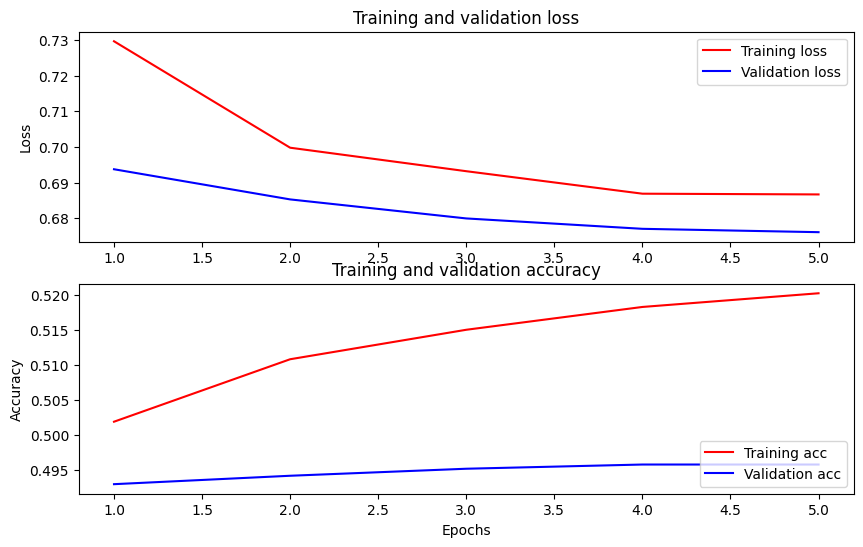

In [83]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [84]:
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [85]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [86]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'this is such an amazing movie!',  # this is the same sentence tried earlier
    'The movie was great!',
    'The movie was meh.',
    'The movie was okish.',
    'The movie was terrible...'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: this is such an amazing movie! : score: 0.520245
input: The movie was great!           : score: 0.505461
input: The movie was meh.             : score: 0.472396
input: The movie was okish.           : score: 0.534838
input: The movie was terrible...      : score: 0.595233

Results from the model in memory:
input: this is such an amazing movie! : score: 0.520245
input: The movie was great!           : score: 0.505461
input: The movie was meh.             : score: 0.472396
input: The movie was okish.           : score: 0.534838
input: The movie was terrible...      : score: 0.595233



In [87]:
serving_results = reloaded_model \
            .signatures['serving_default'](tf.constant(examples))

serving_results = tf.sigmoid(serving_results['classifier'])

print_my_examples(examples, serving_results)

input: this is such an amazing movie! : score: 0.520245
input: The movie was great!           : score: 0.505461
input: The movie was meh.             : score: 0.472396
input: The movie was okish.           : score: 0.534838
input: The movie was terrible...      : score: 0.595233

